# SD212: Graph mining
## Lab 3: Graph structure

In this lab, you will learn to:
* work with **sparse matrices**,
* highlight the **small-world property** of a graph,
* estimate the **clustering coefficient** of a graph,
* generate a **Watts-Strogatz** graph with both the small-world property and a high clustering coefficient.

## Import

In [1]:
import os 
os.getcwd()

'/cal/homes/tchibozo/SD212'

In [2]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [3]:
import numpy as np

In [4]:
from scipy import sparse as sp

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Datasets

You will need the following datasets:
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. Sparse matrices

You will work with adjacency matrices in [scipy CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [8]:
# A simple graph
graph = nx.erdos_renyi_graph(10, 0.4)

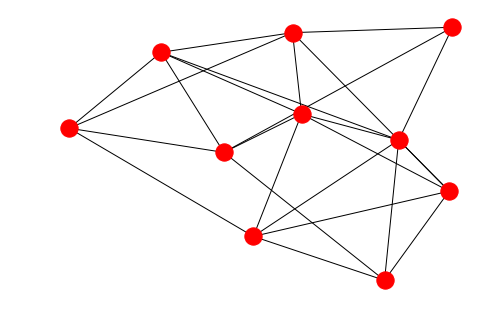

In [9]:
nx.draw(graph)

In [10]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 24
Average degree:   4.8000


In [11]:
# Density
n = graph.number_of_nodes()
m = graph.number_of_edges()
density = 2 * m / n / (n - 1)
print(density)

0.5333333333333333


In [12]:
# Dense adjacency matrix (numpy array)
adjacency = nx.to_numpy_array(graph)

In [13]:
adjacency

array([[ 0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.]])

## CSR format

In [14]:
# Sparse adjacency matrix (scipy csr matrix)
adjacency = nx.to_scipy_sparse_matrix(graph)

In [15]:
adjacency

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [16]:
adjacency.todense()

matrix([[0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
        [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]], dtype=int64)

In [17]:
# Data
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [18]:
# Indices (columns)
adjacency.indices

array([1, 2, 3, 5, 7, 0, 2, 3, 5, 6, 0, 1, 5, 9, 0, 1, 5, 7, 8, 9, 5, 7, 9,
       0, 1, 2, 3, 4, 8, 1, 7, 8, 9, 0, 3, 4, 6, 8, 3, 5, 6, 7, 9, 2, 3, 4,
       6, 8], dtype=int32)

In [19]:
# Index pointers (rows)
adjacency.indptr

array([ 0,  5, 10, 14, 20, 23, 29, 33, 38, 43, 48], dtype=int32)

##### To do

* Generate a new random graph of 10 nodes
* Get the corresponding adjacency matrix as numpy array
* Guess the first 3 entries and the last 3 entries of each vector of the adjacency matrix in ```scipy csr format```: ```data, indices, indptr```
* Check your guess.

In [20]:
#We choose to generate an Erdős-Rényi graph (i.e a binomial graph).
graph = nx.gnp_random_graph(n=10,p=0.1)

In [21]:
adjacency = nx.to_numpy_array(graph)

In [22]:
adjacency

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [23]:
adjacency = nx.to_scipy_sparse_matrix(graph)
adjacency.todense()
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
adjacency.indices

array([2, 3, 4, 0, 1, 4, 9, 1, 3, 7, 6, 8, 7, 3], dtype=int32)

In [25]:
adjacency.indptr

array([ 0,  1,  3,  4,  7,  9,  9, 10, 12, 13, 14], dtype=int32)

## Using sparse matrices

In [26]:
def get_degrees(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int))

In [27]:
get_degrees(adjacency)

array([1, 2, 1, 3, 2, 0, 1, 2, 1, 1], dtype=int64)

In [28]:
def get_neighbors(adjacency, node):
    n = adjacency.shape[0]
    unit_vector = np.zeros(n, dtype = int)
    unit_vector[node] = 1
    return adjacency.dot(unit_vector)

In [29]:
get_neighbors(adjacency, 0)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## To do

* Write a function computing the distances from any given node (see below).<br>
Use distance -1 for nodes that are not accessible.

In [30]:
def get_distances(adjacency, node):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int)
    distances[node] = 0
    unit = np.zeros(n,dtype=int)
    unit[node] = 1
    d =  1
    while((distances == -1).any() and d <n):
        to_update = (distances == -1) & (unit >= 1)
        distances[to_update] = d
        unit = adjacency.dot(unit)
        d += 1
    return distances-1

In [31]:

def get_distances(adjacency, node):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int)
    distances[node] = 0
    reached = np.zeros(n, dtype = int)
    reached[node] = 1
    new_nodes = True
    t = 0
    while new_nodes:
        new_reached = adjacency.dot(reached)
        add_nodes = []
        tmp_lst = list(new_reached - reached)
        for i in range(n):
            if (tmp_lst[i] > 0) & (reached[i] < 1):
                add_nodes.append(i)
        new_nodes = len(add_nodes)
        t += 1
        for node in add_nodes:
            reached[node] = 1
            distances[node] = t
    return distances
        

## 2. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Which fraction of the airports can be reached from Paris Charles de Gaulle in 1, 2, 3 flights?
* Which fraction of the pages are accessible from Paris in 1, 2, 3 clicks on Wikipedia for Schools?

In [32]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [33]:
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)

In [34]:
for node in openflights.nodes:
    if "Gaulle" in openflights.node[node]['name']:
        print(node)
        print(openflights.node[node]['name'])

622
Charles de Gaulle International Airport


In [35]:
init_dist = np.zeros(len(openflights.nodes))
init_dist[622] = 1

In [36]:
one_flight_airports = adjacency * init_dist

In [37]:
#Airports that can be reached in one flight from Paris CDG airport
reached = [i for i in range(len(one_flight_airports)) if one_flight_airports[i] != 0]
print(str(len(reached)/len(openflights.nodes))+' : percent of airports that can be reached within one flight from CDG')

0.07523409751372295 : percent of airports that can be reached within one flight from CDG


In [38]:
#Airports that can be reached in two flights from Paris CDG airport
one_flight_airports = adjacency * init_dist
two_flight_airports = adjacency * one_flight_airports
three_flight_airports = adjacency * two_flight_airports
reached_1 = [i for i in range(len(one_flight_airports)) if one_flight_airports[i] != 0]
reached_2 = [i for i in range(len(two_flight_airports)) if two_flight_airports[i] != 0]
reached_3 = [i for i in range(len(three_flight_airports)) if three_flight_airports[i] != 0]
print(str(len(reached_1)/len(openflights.nodes))+' : percent of airports that can be reached within one flight from CDG')
print(str(len(reached_2)/len(openflights.nodes))+' : percent of airports that can be reached within two flights from CDG')
print(str(len(reached_3)/len(openflights.nodes))+' : percent of airports that can be reached within three flights from CDG')

0.07523409751372295 : percent of airports that can be reached within one flight from CDG
0.6189861155957378 : percent of airports that can be reached within two flights from CDG
0.9089441394898289 : percent of airports that can be reached within three flights from CDG


In [39]:
schools = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
weighted_adjacency = nx.to_scipy_sparse_matrix(schools)
adjacency = nx.to_scipy_sparse_matrix(schools, weight = None)
for node in schools.nodes:
    if "Paris" in schools.node[node]['name']:
        print(node)
        print(schools.node[node]['name'])

46
Paris


In [40]:
init_dist = np.zeros(len(schools.nodes))
init_dist[46] = 1

In [41]:
one_click_schools = adjacency * init_dist
two_click_schools = adjacency * one_click_schools
three_click_schools = adjacency * two_click_schools
reached_1 = [i for i in range(len(one_click_schools)) if one_click_schools[i] != 0]
reached_2 = [i for i in range(len(two_click_schools)) if two_click_schools[i] != 0]
reached_3 = [i for i in range(len(three_click_schools)) if three_click_schools[i] != 0]
print(str(len(reached_1)/len(schools.nodes))+' : percent of schools that can be reached within one click from Paris')
print(str(len(reached_2)/len(schools.nodes))+' : percent of schools that can be reached within two clicks from Paris')
print(str(len(reached_3)/len(schools.nodes))+' : percent of schools that can be reached within three clicks from Paris')

0.06708778043999129 : percent of schools that can be reached within one click from Paris
0.7980832062731431 : percent of schools that can be reached within two clicks from Paris
0.9969505554345458 : percent of schools that can be reached within three clicks from Paris


## To do

Plot the histogram of the distance between two random airports sampled:
1. uniformly
2. in proportion to their degrees
3. in proportion to their traffics

Use 100 samples per histogram.

Interpret the results.

**Hint:** For 2 and 3, use the parameter ```p``` of the function ```np.random.choice```.

In [43]:
# Two random airports, uniform sampling
airports = list(openflights.nodes())
u,v = np.random.choice(airports, size = 2, replace = False)
print(nx.shortest_path_length(openflights, u, v))

4


In [44]:
#uniform sampling
L = []
for i in range(100):
    u,v = np.random.choice(airports, size = 2, replace = False)
    L.append(nx.shortest_path_length(openflights, u, v))
distplot(L)


NameError: name 'distplot' is not defined

In [ ]:
openflights.degree

In [ ]:
#proportion to degree
degrees = [x[1] for x in list(openflights.degree)]
probabilities = degrees/np.sum(degrees)
L = []
for i in range(100):
    u,v = np.random.choice(list(openflights.nodes), size = 2, replace = False,p=probabilities)
    L.append(nx.shortest_path_length(openflights, u, v))
plt.hist(L)
plt.show()

## To do

* Find two airports with degree of separation higher than 8, and show the corresponding path on a map.
* Plot the histograms of the distances from each of these airports to all other airports.

In [45]:
distances_from_0 = get_distances(nx.to_numpy_array(openflights),0)

In [46]:
print(max(distances_from_0))
print(np.argmax(distances_from_0))

9
2277


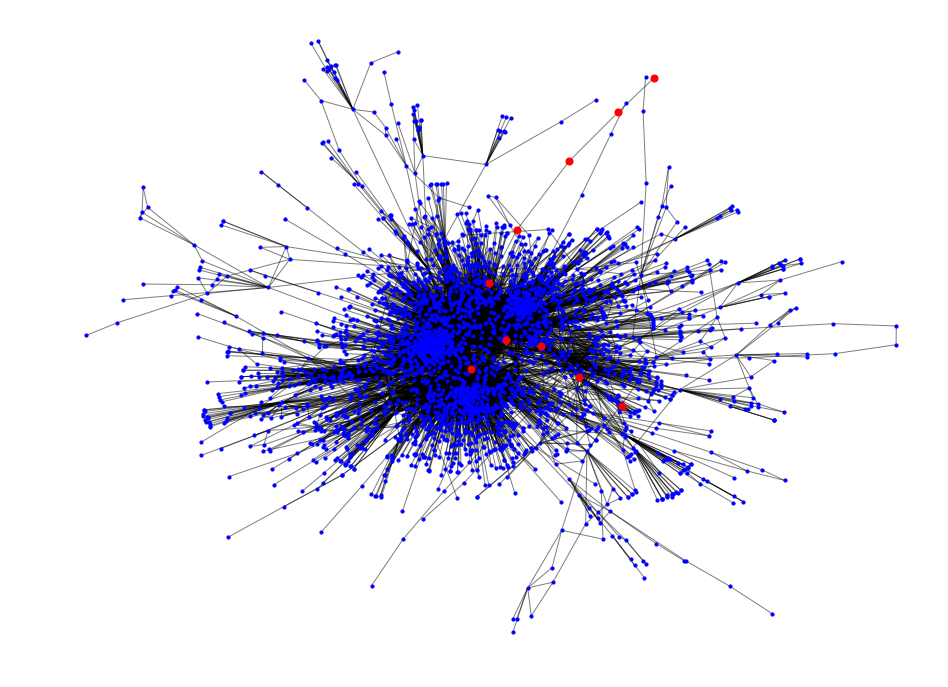

In [47]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
pos = nx.spring_layout(openflights)
path = nx.shortest_path(G=openflights,source=0,target=2277)
nx.draw_networkx_nodes(openflights,pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights,pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openflights,pos, arrows = False, alpha = 0.5)
plt.show()

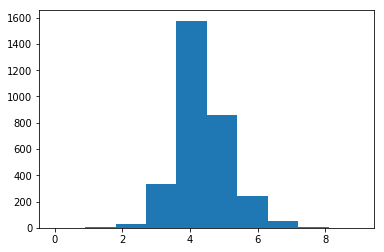

In [48]:
plt.hist(distances_from_0)
plt.show()

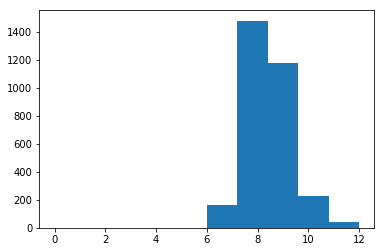

In [49]:
plt.hist(get_distances(nx.to_numpy_array(openflights),2277))
plt.show()

## To do

* Plot the histogram of the distances **from** Plato **to** any other page in Wikipedia for Schools (provided a path exists).
* Plot the histogram of the distances **to** Plato **from** any other page in Wikipedia for Schools (provided a path exists).

In [50]:
graph = nx.read_graphml("wikipedia_schools.graphml", node_type = int)

In [51]:
d = nx.get_node_attributes(G=graph,name='name')
for i in range(len(d)):
    if d[i] == 'Plato':
        print(i)

245


In [52]:
distances_from_Plato = get_distances(nx.to_numpy_array(graph),245)

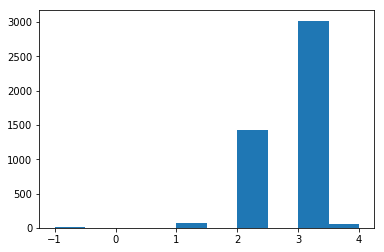

In [53]:
plt.hist(distances_from_Plato)
plt.show()
#3 degrees of separation

In [54]:
#Paths from 1 to 245
list(nx.all_shortest_paths(G=graph,source=1,target=245))

[[1, 4, 1222, 245],
 [1, 1053, 1222, 245],
 [1, 1030, 1066, 245],
 [1, 1030, 49, 245],
 [1, 637, 49, 245],
 [1, 61, 49, 245],
 [1, 1030, 80, 245],
 [1, 630, 80, 245],
 [1, 634, 80, 245],
 [1, 637, 80, 245],
 [1, 61, 80, 245],
 [1, 1030, 127, 245],
 [1, 630, 67, 245],
 [1, 634, 67, 245],
 [1, 1053, 1019, 245],
 [1, 565, 45, 245],
 [1, 565, 1392, 245],
 [1, 565, 123, 245],
 [1, 634, 587, 245],
 [1, 637, 244, 245],
 [1, 61, 342, 245],
 [1, 61, 359, 245]]

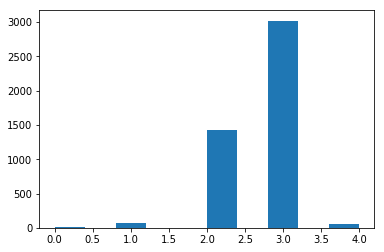

In [55]:
distances_to_plato = []
for i in range(len(list(graph.nodes))):
    try:
        distances_to_plato.append(nx.shortest_path_length(graph,source=i,target=245))
    except:
        distances_to_plato.append(0)
plt.hist(distances_to_plato)
plt.show()
#It is the same graph as it is undirected

In [56]:
distances_to_plato

[3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 0,
 3,
 2,
 3,
 2,


## To do

* Plot the histogram of the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of actors (**without** building the co-starring actor graph).

In [57]:
graph = nx.read_graphml("actors_movies.graphml", node_type = int)
d = nx.get_node_attributes(G=graph,name='name')
for i in range(len(d)):
    if d[i] == 'Plato':
        bacon = i
bacon_list = list(get_distances(nx.to_numpy_array(graph),bacon))
distplot(bacon_list)

MemoryError: 

## 3. Clustering coefficient

You will now learn to compute the clustering coefficient of a graph.

## To do

* Show that the clustering coefficient of node $u$ is equal to:
$$
C_u = \frac {N_u} {d_u(d_u-1)}
$$
where $N_u$ is the total number of paths of length 2 from $u$ to a neighbor of $u$.
* Write a function to compute the clustering coefficient of a node (see below).
* Deduce the clustering coefficient of the graph, given by:
$$
C = \frac{\sum_u d_u(d_u -1)C_u}{\sum_u d_u(d_u -1)}.
$$
* Compute the clustering coefficient of Openflights and Wikipedia for Schools (seen as an undirected graph).
* Compare your results with those of the function ```nx.average_clustering``` and explain the differences, if any.

In [ ]:
graph = nx.read_graphml("miserables.graphml", node_type = int)
dict(graph[28]).keys()
nx

In [ ]:
def get_local_clustering_coefficient(adjacency, node):
    coef = 0
    node_degree = get_degrees(adjacency)[node]
    
    node_vect = np.zeros(adjacency.shape[0])
    node_vect[node] = 1
    N_node = adjacency.dot(adjacency.dot(adjacency.dot(node_vect)))[node] #3 hops

    coef = N_node / (node_degree * (node_degree-1))
    return coef

In [ ]:
def get_clustering_coefficient(adjacency):
    coef = 0
    normalize = 0

    n = adjacency.shape[0]
    degrees = get_degrees(adjacency)
    
    for u in range(n):
        u_degree = degrees[u]
        u_vect = np.zeros(n, dtype=int)
        u_vect[u] = 1
        
        coef += adjacency.dot(adjacency.dot(adjacency.dot(u_vect)))[u] / 2.
        normalize += u_degree * (u_degree - 1) / 2.

    coef /= normalize

    return coef

In [ ]:
get_clustering_coefficient(nx.to_numpy_array(graph)) #This formula is correct

In [ ]:
#Verification
n = 20
d = 8

graph = nx.watts_strogatz_graph(n, d, 0)

print(nx.info(graph))
print(get_clustering_coefficient(nx.to_scipy_sparse_matrix(graph)))
print((3 * (d-2)) / (4 * (d-1)))

# 4. Watts-Strogatz model

Watts-Strogatz graphs have both the small-world property and a high clustering coefficient, for propertly chosen parameters.

In [ ]:
graph = nx.watts_strogatz_graph(20,4,0)

In [ ]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

In [ ]:
graph = nx.watts_strogatz_graph(20,4,0.5)

In [ ]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

## To do

Generate a graph of 10,000 nodes with:
* average degree 20,
* average clustering coefficent larger than 0.5,
* average degree of separation less than 6.

**Hint:** To get an upper bound on the average path length between any pair of distinct nodes, you can consider all paths going through some well chosen node(s). 

In [ ]:
graph = nx.watts_strogatz_graph(10000,20,0.5)
print(nx.info(graph))
#n = nb of nodes
#k = each node joined with its k nearest neighbours in a ring
#p = proba of rewiring each edge


We know that for a Wattz-Strogatz graph : 

$ C = \frac{3}{4}\frac{d-2}{d-1} $

Hence :

$ d = \frac{4c-6}{4c-3}$

We want c > 0.5 

Let's try c = 0.6

In [ ]:
c = 0.6
d = int((4*c-6)/(4*c-3))+1
d

In [ ]:
graph = nx.watts_strogatz_graph(10000,d,0.5)
print(nx.info(graph))



print("Average degree : "+ str(nx.average_degree_connectivity(graph)))
print("Average clustering coefficient : "+ str(get_clustering_coefficient(nx.to_scipy_sparse_matrix(graph)))
)


In [ ]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)